<a href="https://colab.research.google.com/github/Deepakk200/colab_python/blob/main/advertising(csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib
!pip install numpy

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from prettytable import PrettyTable
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# from helper import fit_and_plot_linear, fit_and_plot_multi
%matplotlib inline

In [3]:
path = "/content/drive/MyDrive/datasets/Advertising.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
bin = np.linspace(min(df["TV"]),max(df["TV"]),4)
group_names = ["LOW","MEDIUM","HIGH"]
df["TV-binned"] = pd.cut(df["TV"],bin,labels = group_names,include_lowest = True)
df["TV-binned"].value_counts()

TV-binned
HIGH      71
LOW       70
MEDIUM    59
Name: count, dtype: int64

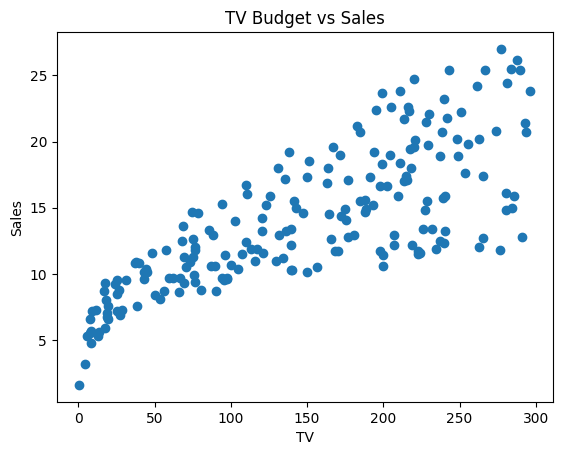

In [5]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV Budget vs Sales')
plt.show()

In [6]:
!wget https://raw.githubusercontent.com/akjadon/Data/master/advertising.csv

--2024-04-21 05:06:17--  https://raw.githubusercontent.com/akjadon/Data/master/advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-04-21 05:06:18 ERROR 404: Not Found.



In [7]:
df_adv = pd.read_csv(path)
# Get a subset of the data i.e. rows 5 to 13
# Use the TV column as the predictor
x_true = df_adv.TV.iloc[5:13]
# print("x - values\n",x_true)
# Use the Sales column as the response
y_true = df_adv.Sales.iloc[5:13]
# print("y - values\n", y_true)
# Sort the data to get indices ordered from lowest to highest TV values
idx = np.argsort(x_true).values
print("sorted the values and given the order : ",idx)
# Get the predictor data in the order given by idx above
x_true  = x_true.iloc[idx].values
print("values after the sorting : ",x_true)
# Get the response data in the order given by idx above
y_true  = y_true.iloc[idx].values
print("values after the sorting : ",y_true)

# Note that this is just for k = 1 where the distance function is
def find_nearest(array, value):
   idx = pd.Series(np.abs(array - value )).idxmin()
   return idx ,array[idx]
# Create some synthetic x-values (might not be in the actual dataset)
x = np.linspace(np.min(x_true), np.max(x_true))
# print(x)
# Initialize the y-values for the length of the synthetic x-values to zero
y = np.zeros((len(x)))
# Apply the KNN algorithm to predict the y-value for the given x value
for i, xi in enumerate(x):
    # Get the Sales values closest to the given x value
    y[i] = y[find_nearest(x, xi )[0]]

sorted the values and given the order :  [3 0 7 1 5 2 4 6]
values after the sorting :  [  8.6   8.7  23.8  57.5  66.1 120.2 199.8 214.7]
values after the sorting :  [ 4.8  7.2  9.2 11.8  8.6 13.2 10.6 17.4]


Text(0, 0.5, 'Sales in $1000')

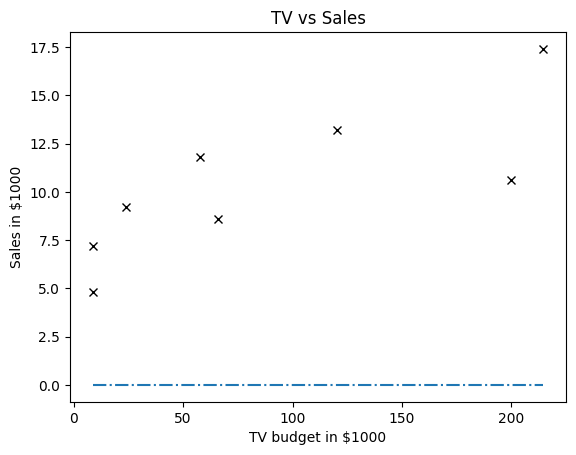

In [8]:
plt.plot(x,y,'-.')
plt.plot(x_true, y_true,' kx')
plt.title('TV vs Sales')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


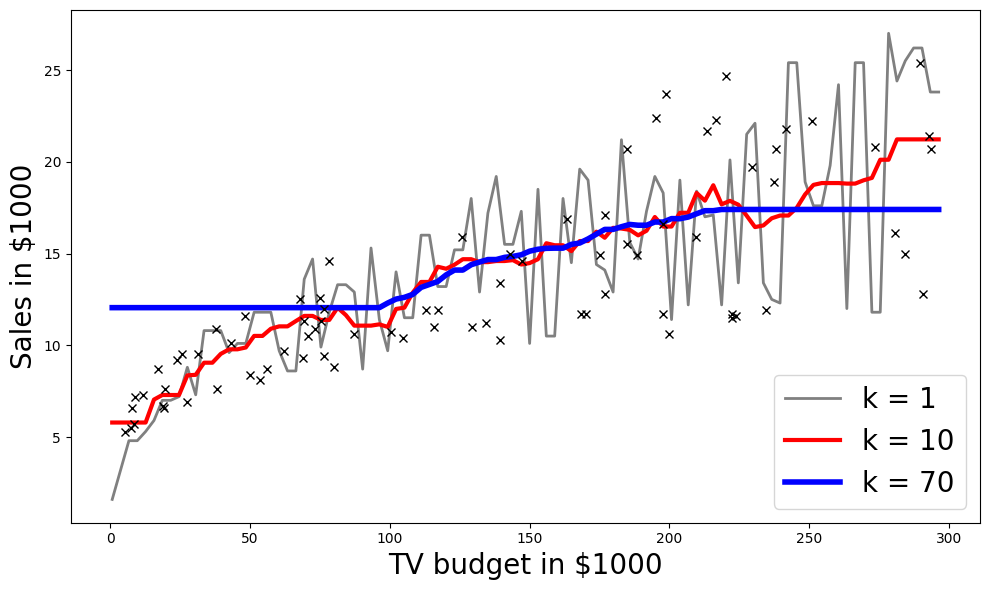

In [9]:
df = pd.read_csv(path)
x = df[['TV']]
y = df['Sales']
# Split the dataset in training and testing with 60% training set
# and 40% testing set with random state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=42)
k_value_min = 1
k_value_max = min(len(x_train), 70)
k_list = np.linspace(k_value_min, k_value_max, 70, dtype=int)
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(10,6))
# Variable used to alter the linewidth of each plot
j=0
# Loop over all the k values
for k_value in k_list:
    # Creating a kNN Regression model
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    # Fitting the regression model on the training data
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals.reshape(-1,1))
        ax.plot(xvals, ypreds,'-',label = f'k = {k_value}',linewidth=j+2,color = colors[j])
        j+=1


ax.legend(loc='lower right',fontsize=20)
ax.plot(x_test, y_test,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

In [10]:
# ----------------unable to use (from helper import fit_and_plot_linear, fit_and_plot_multi) in colab



# # Define an empty Pandas dataframe to store the R-squared value associated with each
# # predictor for both the train and test split
# df_results = pd.DataFrame(columns=['Predictor', 'R2 Train', 'R2 Test'])
# # For each predictor in the dataframe, call the function "fit_and_plot_linear()"
# # from the helper file with the predictor as a parameter to the function

# # This function will split the data into train and test split, fit a linear model
# # on the train data and compute the R-squared value on both the train and test data

# # **Your code here**
# for predictor in ['TV', 'Radio', 'Newspaper']:
#     r2_train, r2_test = fit_and_plot_linear(df[[predictor]])

#     df_results = df_results.append({'Predictor': predictor, 'R2 Train': r2_train, 'R2 Test': r2_test}, ignore_index=True)

# # Call the function "fit_and_plot_multi()" from the helper to fit a multilinear model
# # on the train data and compute the R-squared value on both the train and test data

# # **Your code here**
# r2_train_multi , r2_test_multi = fit_and_plot_multi()
# # Store the R-squared values for all models
# # in the dataframe intialized above
# # **Your code here**
# df_results = df_results.append({'Predictor': 'Multi-linear', 'R2 Train': r2_train_multi, 'R2 Test': r2_test_multi}, ignore_index=True)
# # Take a quick look at the dataframe
# df_results.head()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df_results = pd.DataFrame(columns=['predictor', 'R2 TRAIN', 'R2 TEST'])

# Iterate through the predictors
for i in ['TV', 'Radio', 'Newspaper']:
    X = df[[i]]
    y = df['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate R-squared values for training and testing sets
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    # Append the results to the DataFrame
    df_results.loc[len(df_results)] = {'predictor': i, 'R2 TRAIN': r2_train, 'R2 TEST': r2_test}
df_results.head()

,predictor,R2 TRAIN,R2 TEST
0,TV,0.591167,0.676695
1,Radio,0.350906,0.263431
2,Newspaper,0.056584,0.029872


In [12]:
for i in ['TV', 'Radio', 'Newspaper']:
    X_multi = df[[i]]
    y_multi = df['Sales']
    X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
    alpha = 0.1
    model_multi =  Ridge(alpha=alpha)

    model_multi.fit(X_train_multi, y_train_multi)
    # Calculate R-squared values for training and testing sets
    r2_train_multi = model_multi.score(X_train_multi, y_train_multi)
    r2_test_multi = model_multi.score(X_test_multi, y_test_multi)

df_results.loc[len(df_results)] = {'predictor':' Multi-linear', 'R2 TRAIN': r2_train_multi, 'R2 TEST': r2_test_multi}
df_results.head()

,predictor,R2 TRAIN,R2 TEST
0,TV,0.591167,0.676695
1,Radio,0.350906,0.263431
2,Newspaper,0.056584,0.029872
3,Multi-linear,0.056584,0.029872


In [13]:
mse_list = []

# Create a list of lists of all unique predictor combinations
# For example, if you have 2 predictors,  A and B, you would
# end up with [['A'],['B'],['A','B']]
cols = [['TV'],['Radio'],['Newspaper'],['TV','Radio'],['TV','Newspaper'],['Radio','Newspaper'],['TV','Radio','Newspaper']]
# Loop over all the predictor combinations
for i in cols:
    x = df[i]
    y = df['Sales']

    # Set random_state as 0
    x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 0)
    lreg = LinearRegression()
    lreg.fit(x_train, y_train)
    y_pred = lreg.predict(x_test)
    MSE = mean_squared_error(y_test , y_pred)

    # Append the computed MSE to the initialized list
    mse_list.append(MSE)
# Helper code to display the MSE for each predictor combination
t = PrettyTable(['Predictors', 'MSE'])
for i in range(len(mse_list)):
    t.add_row([cols[i],round(mse_list[i],3)])

print(t)


+------------------------------+--------+
|          Predictors          |  MSE   |
+------------------------------+--------+
|            ['TV']            | 10.186 |
|          ['Radio']           | 24.237 |
|        ['Newspaper']         | 32.137 |
|       ['TV', 'Radio']        | 4.391  |
|     ['TV', 'Newspaper']      | 8.688  |
|    ['Radio', 'Newspaper']    | 24.783 |
| ['TV', 'Radio', 'Newspaper'] | 4.402  |
+------------------------------+--------+


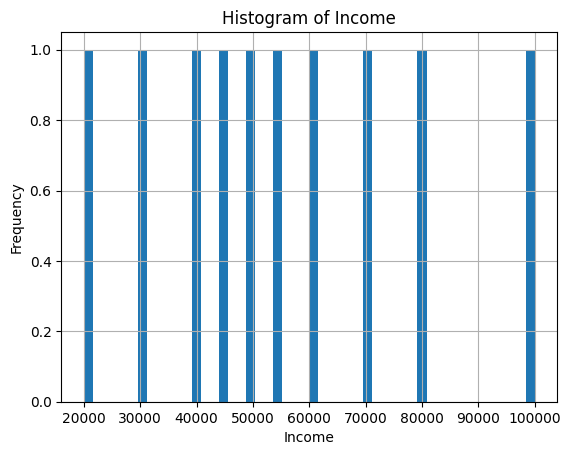

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data = {'income': [20000, 30000, 40000, 45000, 50000, 55000, 60000, 70000, 80000, 100000]}
df = pd.DataFrame(data)

# Plot histogram with 5 bins
df.hist(column='income', bins=50)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()